## Data mining applied to a Dataset:
Insurance Charges

| Variable | Description | Type |
|----------|----------|----------|
age | Age of insured | Numeric | Numeric |
| sex | Gender (male / female) | Categorical | |
| bmi | Body Mass Index (BMI) | Numeric |
| children | Number of children | Numeric | Numeric |
| smoker | If smoker (yes / no) | Categorical |
| region | Geographical area (northeast, southwest, etc.) | Categorical |
| charges | Cost of insurance (target variable) | Numerical |

In [ ]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Making sure the path is correctly set
import os
print(os.getcwd())

c:\Users\mitru\Downloads\DATA MINING\Data Science


In [ ]:
df_insurance = pd.read_csv("insurance.csv")
df_insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df_insurance.shape

(1338, 7)

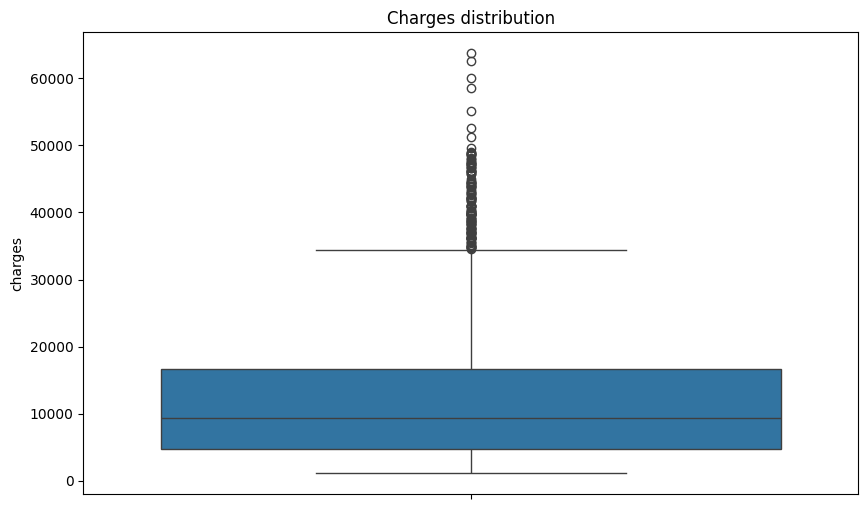

In [ ]:
#Showing the charges distribution before for the normalization of the data.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_insurance['charges'])
plt.title("Charges distribution")
plt.show()

In [ ]:
#Turn the categorical variables into Dummie variables

df_medical_dummies = pd.get_dummies(df_insurance, columns= ['sex'], prefix='dummies', prefix_sep='_', drop_first=True)
df_medical_dummies = pd.get_dummies(df_medical_dummies, columns= ['smoker'], prefix='dummies_smoker', prefix_sep='_', drop_first=True)
df_medical_dummies = pd.get_dummies(df_medical_dummies, columns= ['region'], prefix='dummies', prefix_sep='_', drop_first=True)

df_medical_dummies.head()

,age,bmi,children,charges,dummies_male,dummies_smoker_yes,dummies_northwest,dummies_southeast,dummies_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
#Separate the variables
x = df_medical_dummies.drop(columns='charges') # Independent variable
y = df_medical_dummies['charges'] # Dependent variable

#Normalization of the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

medical_expenses_scaled = scaler.fit_transform(x)

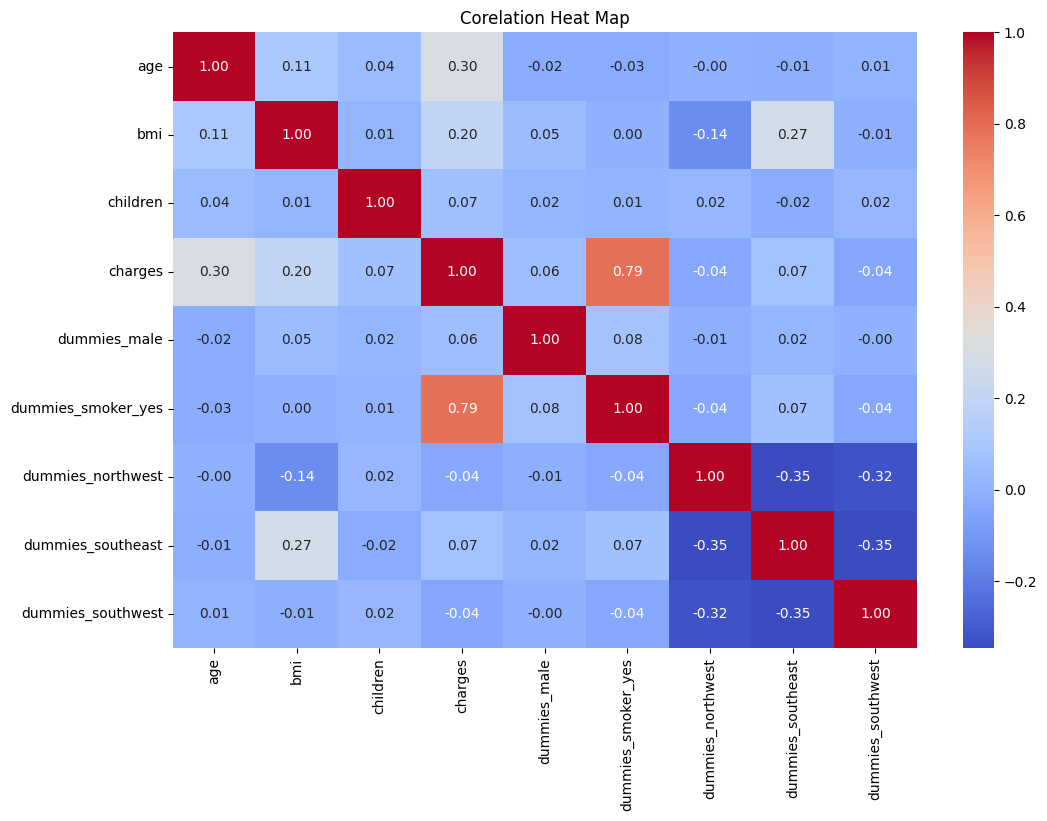

In [ ]:
#Grapic
corr_matrix = df_medical_dummies.corr()

#Corelation matrix heat map
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corelation Heat Map')
plt.show()

In [ ]:
#Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(medical_expenses_scaled, y, test_size=0.2, random_state=42)

#Linear regresion model
modelo = LinearRegression()
modelo.fit(x_train, y_train)

#Prediction
y_pred = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y_test,y_pred) #Comparation between the prediction model and the original dataset.
mse = mean_squared_error(y_test,y_pred)

print(f"r2_score:{score}, mean_squared_error:{mse}")

r2_score:0.7835929767120723, mean_squared_error:33596915.85136147


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

score = r2_score(y_test,y_pred) #Comparation between the prediction model and the original dataset.
mse = mean_squared_error(y_test,y_pred)

print(f"r2_score:{score}, mean_squared_error:{mse}") #We can see that this model is more precise than the linear regression.

r2_score:0.8655948876523016, mean_squared_error:20866223.19798948
